In [4]:
from modules_import import *

In [5]:
USarray = pd.read_excel('_US-TA-StationList.xls')
USarrLon = USarray['LON']
USarrLat = USarray['LAT']

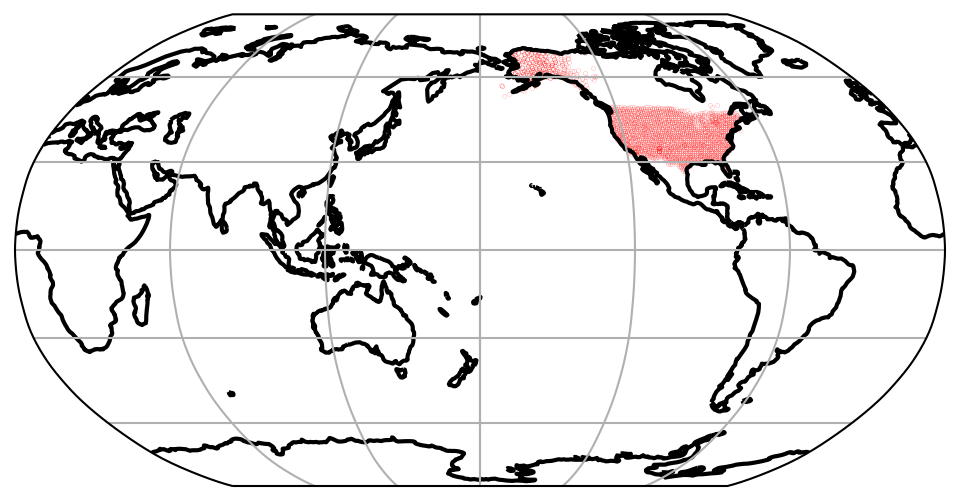

In [50]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.axes(projection=ccrs.Robinson(180))

ax.set_global()

plt.scatter(
    x=USarrLon,
    y=USarrLat,
    color="red",
    s=0.001,
    alpha=1,
    transform=ccrs.PlateCarree()
)

ax.coastlines()
ax.gridlines()


plt.show()

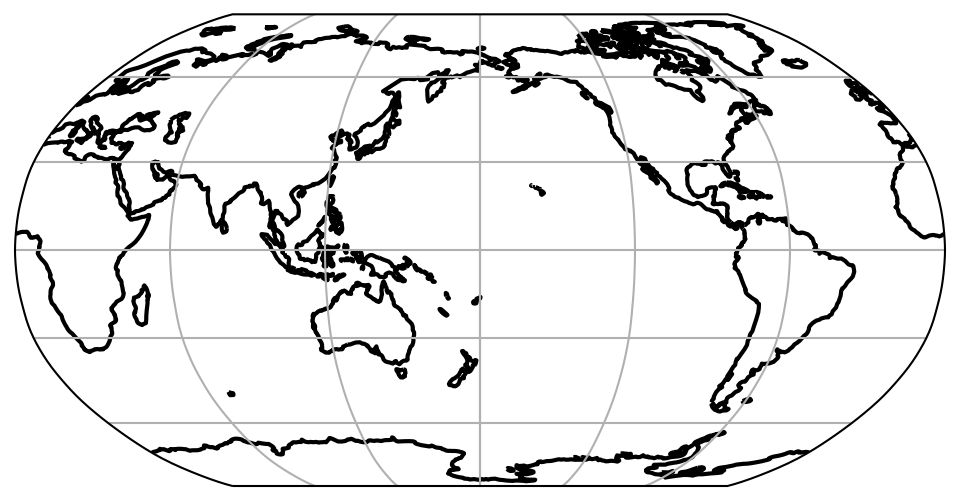

In [16]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.axes(projection=ccrs.Robinson(180))

ax.coastlines()
ax.gridlines()


plt.show()

In [ ]:
path_file = '../../00_data/glad-m25-vp-0.0-n4.nc'

data = xr.open_dataset(path_file)

offline = True
old = False

if offline and old:
    dep_ini, dep_inc = 11, 4
    lat_ini, lat_inc = 0, 8
    lon_ini, lon_inc = 0, 8
else:
    dep_ini, dep_inc = 11, 1 #4
    lat_ini, lat_inc = 0, 4
    lon_ini, lon_inc = 0, 4    

# variables
vpv = data.variables['vpv'].values[dep_ini::dep_inc, lat_ini::lat_inc, lon_ini::lon_inc]
vph = data.variables['vph'].values[dep_ini::dep_inc, lat_ini::lat_inc, lon_ini::lon_inc]
longitude = data.variables['longitude'].values[lon_ini::lon_inc]
latitude = data.variables['latitude'].values[lat_ini::lat_inc]
depth = data.variables['depth'].values[dep_ini::dep_inc]

dep_dim = vpv.shape[0]
lat_dim = vpv.shape[1]
lon_dim = vpv.shape[2]

LAT, ALT, LON = np.meshgrid(latitude, -1e3*depth, longitude)
x, y, z = pm.geodetic2ecef(LAT, LON, ALT)
_, DEP, _ = np.meshgrid(latitude, depth, longitude)


In [ ]:
# load US array data
USarray = pd.read_excel('_US-TA-StationList.xls')
USarrLon = USarray['LON']
USarrLat = USarray['LAT']

# model specifications
ear_rad = 6371
lat_sou = np.array([latitude.flat[np.abs(latitude - i).argmin()] for i in USarrLat])
lon_sou = np.array([longitude.flat[np.abs(longitude - i).argmin()] for i in USarrLon])
dep_sou = depth.flat[np.abs(depth - 0).argmin()]

xx = (ear_rad - DEP) * np.sin(np.radians(LAT+90)) * np.cos(np.radians(180+LON))/(1e3)
yy = (ear_rad - DEP) * np.sin(np.radians(LAT+90)) * np.sin(np.radians(180+LON))/(1e3)
zz = DEP * np.cos(np.radians(LAT+90)) / (1e3)

xx_s = (ear_rad - dep_sou) * np.sin(np.radians(lat_sou+90)) * np.cos(np.radians(180+lon_sou))/(1e3)
yy_s = (ear_rad - dep_sou) * np.sin(np.radians(lat_sou+90)) * np.sin(np.radians(180+lon_sou))/(1e3)

# coordinates setup
sx, sy, sz = pm.geodetic2ecef(lat_sou, lon_sou, -1e3*dep_sou)

# rescale
x,y,z = x/(ear_rad*1e3), y/(ear_rad*1e3), z/(ear_rad*1e3)
sx, sy, sz = sx/(ear_rad*1e3), sy/(ear_rad*1e3), sz/(ear_rad*1e3)

X,Y,Z = x,y,z

In [ ]:
xS = np.tile(sx, 100)

In [ ]:
np.tile(sy,Y.size//sy.shape[0]+1)[:Y.size].size == X.size, X.size-2440*sx.shape[0]

In [ ]:
np.tile(sx,X.size//sx.shape[0]+1)[:X.size]

In [ ]:
# model parameters
from velocity_function import *

# define receiver coordinates
xR, yR, zR = X.reshape(-1,1), Y.reshape(-1,1), Z.reshape(-1,1)

# define source coordinates
# xS, yS, zS = sx*np.ones_like(X.reshape(-1,1)), sy*np.ones_like(X.reshape(-1,1)), sz*np.ones_like(X.reshape(-1,1))
xS, yS, zS = np.tile(sx,X.size//sx.shape[0]+1)[:X.size].reshape(-1,1), np.tile(sy,Y.size//sy.shape[0]+1)[:Y.size].reshape(-1,1), np.tile(sz,Z.size//sz.shape[0]+1)[:Z.size].reshape(-1,1)

In [ ]:
xS, yS, zS = np.tile(sx,(X.size//sx.shape[0]+1, 1))[:X.size].reshape(-1,1), np.tile(sy,(Y.size//sy.shape[0]+1,1))[:Y.size].reshape(-1,1), np.tile(sz,(Z.size//sz.shape[0]+1,1))[:Z.size].reshape(-1,1)

In [ ]:
# define inputs and output
Xp = np.hstack((xS, yS, zS, xR, yR, zR))
yp = vel_gap.reshape(-1,1)

# input for database
Xb = np.copy(Xp)
yb = np.copy(yp)

# random sampling
X_train, X_test, y_train, y_test = train_test_split(
    Xp[np.logical_not(np.isnan(yp))[:,0]], 
    yp[np.logical_not(np.isnan(yp))].reshape(-1,1), 
    test_size=0.1,
    random_state=1335
)

In [ ]:

X_starf = [X_train[:,3].reshape(-1,1), X_train[:,4].reshape(-1,1), X_train[:,5].reshape(-1,1)]

In [ ]:
sids = [np.where((np.isclose(X_starf[0], sx[i])) & (np.isclose(X_starf[1], sy[i])) & (np.isclose(X_starf[2], sz[i]))) for i in range(len(sx))]
sids = np.asarray(sids)[:,0]
sids = sids[sids.astype(bool)].astype(int)

In [ ]:
sids = np.asarray(sids)[:,0]
sids = sids[sids.astype(bool)].astype(int)

In [ ]:
print("after")
print(sids.shape)
print(X_starf[0][sids,0])
print(X_starf[1][sids,0])
print(X_starf[2][sids,0])
print(sx,sy,sz)

In [1]:
from model import *

(array([10366, 10539, 10539, ..., 14673, 14673, 14688]), array([323, 315, 316, ...,   1, 568, 582]))
[[ 0.12723418]
 [-0.12519088]
 [-0.12519088]
 ...
 [-0.28321096]
 [-0.28321096]
 [-0.18222106]] [[-0.90531814]
 [-0.8907796 ]
 [-0.8907796 ]
 ...
 [-0.12609363]
 [-0.12609363]
 [-0.25080577]] [[0.40430745]
 [0.43579215]
 [0.43579215]
 ...
 [0.94772875]
 [0.94772875]
 [0.94772875]]


/home/taufikmh/miniconda3/envs/thesis-pytorch/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


after
[1734843  261311  261311 ...  621937  621937 4244846]
[ 0.12723418 -0.12519088 -0.12519088 ... -0.28321096 -0.28321096
 -0.18222106]
[-0.90531814 -0.8907796  -0.8907796  ... -0.12609363 -0.12609363
 -0.25080577]
[0.40430745 0.43579215 0.43579215 ... 0.94772875 0.94772875 0.94772875]
[[ 0.12723418]
 [-0.12519088]
 [-0.12519088]
 ...
 [-0.28321096]
 [-0.28321096]
 [-0.18222106]] [[-0.90531814]
 [-0.8907796 ]
 [-0.8907796 ]
 ...
 [-0.12609363]
 [-0.12609363]
 [-0.25080577]] [[0.40430745]
 [0.43579215]
 [0.43579215]
 ...
 [0.94772875]
 [0.94772875]
 [0.94772875]]
0.000470802


In [2]:
model = Model(model_path,VelocityClass=VelocityFunction(),device="cuda:0")

# if torch.cuda.device_count() > 1:
#   print("Let's use", torch.cuda.device_count(), "GPUs!")
#   model = torch.nn.DataParallel(model)
#   model.to(device)

model.load('../../07_pytorch_implementation/models/bacvel_10_shallow/Model_Epoch_00160_ValLoss_0.003003701814964081.pt')

In [3]:
model.train()

0.000470802
cuda:0


RuntimeError: grad can be implicitly created only for scalar outputs